In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [39]:
df1=pd.read_csv('promotions.csv')
df2=df1.dropna()
df2=df2.drop(columns=['employee_id'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            48660 non-null  object 
 1   region                48660 non-null  object 
 2   education             48660 non-null  object 
 3   gender                48660 non-null  object 
 4   recruitment_channel   48660 non-null  object 
 5   no_of_trainings       48660 non-null  int64  
 6   age                   48660 non-null  int64  
 7   previous_year_rating  48660 non-null  float64
 8   length_of_service     48660 non-null  int64  
 9   KPIs_met >80%         48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [40]:
def cat_encode(data_df, method, col, prefix):
    if (method == 1):   #label (simple) encoding
        le = LabelEncoder()
        data_df[col]= le.fit_transform(data_df[col].astype(str))
    elif (method == 2): #one-hot encoding
        dummies_df  = pd.get_dummies(data_df[col].astype(str), prefix=prefix)        
        data_df = data_df.join(dummies_df)
    
    return data_df

In [41]:
cat_encode(df2,1,'department',1)
cat_encode(df2,1,'region',1)
cat_encode(df2,1,'education',1)
cat_encode(df2,1,'gender',1)
cat_encode(df2,1,'recruitment_channel',1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,7,5,0,1,0,2,31,1.0,2,0,0,49,0
54803,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,27,5.0,3,1,0,79,0


In [42]:
df2.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [43]:
y=df2[['is_promoted']]
x=df2.drop(columns=['is_promoted'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestClassifier

feature_names = x.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

<ipython-input-44-74c526c60355>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [45]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.014 seconds


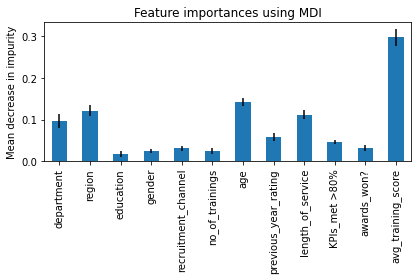

In [46]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [26]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

/Users/kirilsem/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Elapsed time to compute the importances: 12.594 seconds


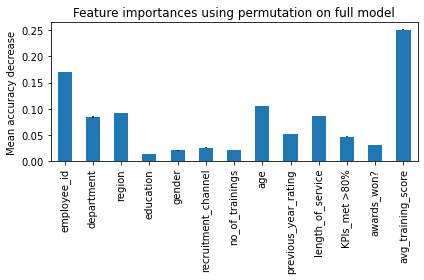

In [37]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()